# Topic Modeling #

In [3]:
import pandas as pd
import numpy as np
import nltk
import gensim
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
from gensim import corpora, models
from itertools import chain
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# read csv
df = pd.read_csv('clean_tweets.csv')
df.head()

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0.1,Unnamed: 0,Tweet Id,Text,Username,cleaned_text,Date,year,month
0,0,0,6.822791e+17,@Daily_Star they better keep a close eye on th...,carisbrook5,better keep close eye kid commit suicide depre...,2015-12-30 19:16:32+00:00,2015,12
1,1,1,6.822476e+17,Calling customer service lines gives me #diarr...,ktandthekittens,calling customer service line give diarrhea tm...,2015-12-30 17:11:12+00:00,2015,12
2,2,2,6.822329e+17,5 Ways to Relieve Stress in 2016 https://t.co/...,ThriveStreams,way relieve stress via blog mentalhealth newye...,2015-12-30 16:13:04+00:00,2015,12
3,3,3,6.822210e+17,Sweet story. #anxiety #depression #coping #men...,ynniv129,sweet story anxiety depression coping mentalhe...,2015-12-30 15:25:33+00:00,2015,12
4,4,4,6.820633e+17,5 Different Types of Motivation https://t.co/x...,workttech,different type motivation motivation mentalhealth,2015-12-30 04:59:08+00:00,2015,12


### 2015 ###

In [5]:
# convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# create 2015 dataset
df15 = df[df['Date'].dt.year == 2015]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# tokenization
df15['tokens'] = df15.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)

df15.head()

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-750ad2e192a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df15['tokens'] = df15.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)


,Unnamed: 0.1,Unnamed: 0,Tweet Id,Text,Username,cleaned_text,Date,year,month,tokens
0,0,0,6.822791e+17,@Daily_Star they better keep a close eye on th...,carisbrook5,better keep close eye kid commit suicide depre...,2015-12-30 19:16:32+00:00,2015,12,"[better, keep, close, eye, kid, commit, suicid..."
1,1,1,6.822476e+17,Calling customer service lines gives me #diarr...,ktandthekittens,calling customer service line give diarrhea tm...,2015-12-30 17:11:12+00:00,2015,12,"[calling, customer, service, line, give, diarr..."
2,2,2,6.822329e+17,5 Ways to Relieve Stress in 2016 https://t.co/...,ThriveStreams,way relieve stress via blog mentalhealth newye...,2015-12-30 16:13:04+00:00,2015,12,"[way, relieve, stress, via, blog, mentalhealth..."
3,3,3,6.822210e+17,Sweet story. #anxiety #depression #coping #men...,ynniv129,sweet story anxiety depression coping mentalhe...,2015-12-30 15:25:33+00:00,2015,12,"[sweet, story, anxiety, depression, coping, me..."
4,4,4,6.820633e+17,5 Different Types of Motivation https://t.co/x...,workttech,different type motivation motivation mentalhealth,2015-12-30 04:59:08+00:00,2015,12,"[different, type, motivation, motivation, ment..."


In [7]:
# create dictionary
dictionary15 = corpora.Dictionary(df15['tokens'])

# number of unique words
print(dictionary15.num_nnz)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


309925


In [8]:
# create document term matrix
doc_term_matrix = [dictionary15.doc2bow(doc) for doc in df15['tokens'] ]
print(len(doc_term_matrix))

36785


/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# get the coherence value for k topics
coherence = []
lda = gensim.models.ldamodel.LdaModel

for k in range(5,21):
    print('Round: '+str(k))
    ldamodel = lda(doc_term_matrix, num_topics=k, \
               id2word = dictionary15, passes=50,\
               iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=df15['tokens'],\
         dictionary=dictionary15, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20


In [10]:
# set x and y values to number of topics and coherence value respectively
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


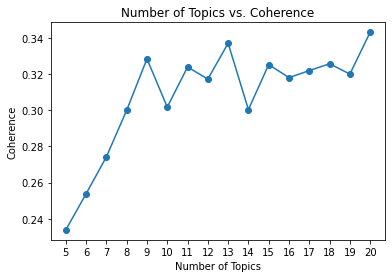

In [11]:
# graph coherence value
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.savefig('cv_15.png')
plt.show()

In [12]:
# fit model on dataset after choosing the best number of topics
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(doc_term_matrix, num_topics=9, id2word = dictionary15, passes=50,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# use pyLDAvis to determine lambda value and visualize clusters
topic_data15 =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary15, mds = 'pcoa')
pyLDAvis.save_html(topic_data15, 'lda15.html')
pyLDAvis.display(topic_data15)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [14]:
# create dictionary for each topic, including words and weights
all_topics = {}
num_terms = 10 
lambd = 0.4 
for i in range(1,10): 
    topic = topic_data15.topic_info[topic_data15.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# convert dictionary to dataframe
topics15 = pd.DataFrame(all_topics).T
topics15.to_csv('topics_15.csv',index=False)
topics15

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9
Topic 1,depression,people,feel,make,mentalhealth,experience,like,time,year,hard
Topic 2,mental,health,mentalhealth,support,school,service,petition,endstigma,taught,education
Topic 3,mentalhealth,awareness,looking,link,patient,raise,digital,forward,dementia,drug
Topic 4,depression,show,see,pain,july,edge,unemployment,thth,exercise,anything
Topic 5,anxiety,mom,yoga,meditation,stress,anxietyproblems,panic,tip,attack,fear
Topic 6,chair,wheel,ptsd,van,used,please,trying,veteran,helping,share
Topic 7,near,military,road,recovery,afspforum,miss,tbi,always,lewis,bankruptcy
Topic 8,check,therapy,book,follow,healing,thx,alt,awarriorsgarden,independent,post
Topic 9,trauma,impact,nightmare,induced,survivor,well,stress,take,enjoy,rest


### 2016 ###

In [16]:
# create 2016 dataset
df16 = df[df['Date'].dt.year == 2016]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# tokenization
df16['tokens'] = df16.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)

df16.head()

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-0b4cee82f1dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['tokens'] = df16.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)


,Unnamed: 0.1,Unnamed: 0,Tweet Id,Text,Username,cleaned_text,Date,year,month,tokens
36785,36785,0,8.148665e+17,#Anxiety is the most commonly #diagnosed #diso...,StepOneRehab,anxiety commonly diagnosed disorder today mill...,2016-12-30 16:11:23+00:00,2016,12,"[anxiety, commonly, diagnosed, disorder, today..."
36786,36786,1,8.148559e+17,This is so despicable &amp; disgusting!\n#JoeR...,halo121371,despicable disgusting joerobertson usnavy vete...,2016-12-30 15:29:18+00:00,2016,12,"[despicable, disgusting, joerobertson, usnavy,..."
36787,36787,2,8.148445e+17,cold water #shower may aid #depression bc they...,MissKShea,cold water shower may aid depression stimulate...,2016-12-30 14:44:06+00:00,2016,12,"[cold, water, shower, may, aid, depression, st..."
36788,36788,3,8.146784e+17,.@PJK4brainhealth More real world examples of ...,nancybyatt,real world example need mentalhealth reform,2016-12-30 03:44:01+00:00,2016,12,"[real, world, example, need, mentalhealth, ref..."
36789,36789,4,8.145919e+17,Neither am I Carrie. Thanks for having a voice...,ctopher313,neither carrie thanks voice voice shake trembl...,2016-12-29 22:00:10+00:00,2016,12,"[neither, carrie, thanks, voice, voice, shake,..."


In [18]:
# create dictionary
dictionary16 = corpora.Dictionary(df16['tokens'])

# number of unique words
print(dictionary16.num_nnz)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


370274


In [19]:
# create document term matrix
doc_term_matrix = [dictionary16.doc2bow(doc) for doc in df16['tokens'] ]
print(len(doc_term_matrix))

43215


/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# get the coherence value for k topics
coherence = []

for k in range(5,21):
    print('Round: '+str(k))
    ldamodel = lda(doc_term_matrix, num_topics=k, \
               id2word = dictionary16, passes=50,\
               iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=df16['tokens'],\
         dictionary=dictionary16, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20


In [21]:
# set x and y values to number of topics and coherence value respectively
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


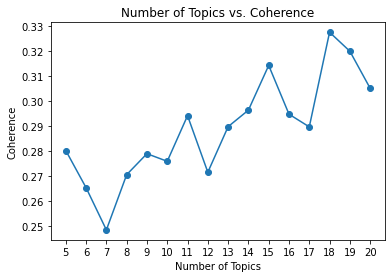

In [22]:
# graph coherence value
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.savefig('cv_16.png')
plt.show()

In [27]:
# fit model on dataset after choosing the best number of topics
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(doc_term_matrix, num_topics=18, id2word = dictionary16, passes=50,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# use pyLDAvis to determine lambda value and visualize clusters
topic_data16 =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary16, mds = 'pcoa')
pyLDAvis.save_html(topic_data16, 'lda16.html')
pyLDAvis.display(topic_data16)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [31]:
# create dictionary for each topic, including words and weights
all_topics = {}
num_terms = 10 
lambd = 0.4
for i in range(1,19): 
    topic = topic_data16.topic_info[topic_data16.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# convert dictionary to dataframe
topics16 = pd.DataFrame(all_topics).T
topics16.to_csv('topics_16.csv',index=False)
topics16

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9
Topic 1,like,feel,know,feeling,depression,thing,bipolar,someone,anxiety,better
Topic 2,issue,people,talk,stigma,important,young,need,problem,help,mentalhealth
Topic 3,anxiety,stress,fear,tip,panic,attack,sleep,anxious,insomnia,reduce
Topic 4,great,thank,looking,forward,mentalhealth,meeting,talking,speaking,discussing,interesting
Topic 5,awareness,raise,article,vote,info,together,month,please,community,reform
Topic 6,child,school,youth,parent,kid,autism,impact,teen,training,adult
Topic 7,thanks,student,free,group,support,helping,college,education,retweet,supporting
Topic 8,today,take,day,well,done,enjoy,every,twitter,rest,lovely
Topic 9,health,mental,illness,physical,cannabis,marijuana,medical,hospital,disease,disorder
Topic 10,psychology,mindfulness,love,happy,quote,art,happiness,medium,soldier,remember


### 2017 ###

In [5]:
# create 2017 dataset
df17 = df[df['Date'].dt.year == 2017]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# tokenization
df17['tokens'] = df17.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)

df17.head()

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-6-edfa9d432f4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df17['tokens'] = df17.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)


,Unnamed: 0.1,Unnamed: 0,Tweet Id,Text,Username,cleaned_text,Date,year,month,tokens
80000,80000,0,9.471699e+17,#depression #OCD\nCentral CT Anxiety OCD Tre...,VanSource,depression ocd central anxiety ocd treatment l...,2017-12-30 18:18:07+00:00,2017,12,"[depression, ocd, central, anxiety, ocd, treat..."
80001,80001,1,9.471549e+17,"Me, like all the time. Well, when I absolutely...",INFJPhD,like time well absolutely make call course inf...,2017-12-30 17:18:23+00:00,2017,12,"[like, time, well, absolutely, make, call, cou..."
80002,80002,2,9.470721e+17,#InsomniaChronicles : woke up at 4:35A. Lied a...,mayanorthen,insomniachronicles woke lied awake got writing...,2017-12-30 11:49:22+00:00,2017,12,"[insomniachronicles, woke, lied, awake, got, w..."
80003,80003,3,9.470716e+17,How #introverts feel when cashiers call a whol...,INFJPhD,introvert feel cashier call whole store attent...,2017-12-30 11:47:17+00:00,2017,12,"[introvert, feel, cashier, call, whole, store,..."
80004,80004,4,9.469808e+17,#2017 #boyitellya #ending the year with #alope...,carlos74452973,boyitellya ending year alopecia wtf grateful f...,2017-12-30 05:46:30+00:00,2017,12,"[boyitellya, ending, year, alopecia, wtf, grat..."


In [7]:
# create dictionary
dictionary17 = corpora.Dictionary(df17['tokens'])

# number of unique words
print(dictionary17.num_nnz)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


438822


In [8]:
# create document term matrix
doc_term_matrix = [dictionary17.doc2bow(doc) for doc in df17['tokens'] ]
print(len(doc_term_matrix))

45644


/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# get the coherence value for k topics
coherence = []

for k in range(5,21):
    print('Round: '+str(k))
    ldamodel = lda(doc_term_matrix, num_topics=k, \
               id2word = dictionary17, passes=50,\
               iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=df17['tokens'],\
         dictionary=dictionary17, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20


In [17]:
# set x and y values to number of topics and coherence value respectively
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


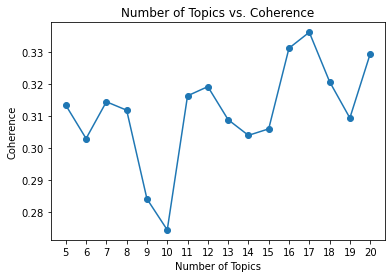

In [11]:
# graph coherence value
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.savefig('cv_17.png')
plt.show()

In [56]:
# fit model on dataset after choosing the best number of topics
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(doc_term_matrix, num_topics=10, id2word = dictionary17, passes=50,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# use pyLDAvis to determine lambda value and visualize clusters
topic_data17 =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary17, mds = 'pcoa')
pyLDAvis.save_html(topic_data17, 'lda17.html')
pyLDAvis.display(topic_data17)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [59]:
# create dictionary for each topic, including words and weights
all_topics = {}
num_terms = 10 
lambd = 0.4
for i in range(1,11): 
    topic = topic_data17.topic_info[topic_data17.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
# convert dictionary to dataframe
topics17 = pd.DataFrame(all_topics).T
topics17.to_csv('topics_17.csv',index=False)
topics17

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9
Topic 1,mentalhealth,mental,health,support,stigma,issue,need,great,important,awareness
Topic 2,anxiety,depression,stress,feeling,know,attack,panic,life,feel,fear
Topic 3,blog,one,read,got,thing,year,christmas,ive,post,depression
Topic 4,looking,well,forward,tomorrow,mentalhealth,mhaw,york,follow,evening,wellness
Topic 5,join,difference,sign,school,make,uk,suicideprevention,education,cannabis,mentalhealth
Topic 6,psychology,quote,happiness,recovery,motivation,inspiration,life,survivor,na,healing
Topic 7,worldhealthday,letstalk,exercise,beatanxiety,fitness,food,nutrition,consisted,workout,mile
Topic 8,risk,dementia,symptom,treatment,medium,patient,worth,va,complex,attempt
Topic 9,ptsd,near,veteran,watching,vet,lovely,military,home,tbi,war
Topic 10,woman,treating,eating,prayer,science,effective,severe,party,disorder,teenager


### 2018 ###

In [64]:
# create 2018 dataset
df18 = df[df['Date'].dt.year == 2018]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
# tokenization
df18['tokens'] = df18.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)

df18.head()

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-65-62381431feef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df18['tokens'] = df18.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)


,Unnamed: 0.1,Unnamed: 0,Tweet Id,Text,Username,cleaned_text,Date,year,month,tokens
319123,319123,0,1.023222e+18,Take me to the sea 🌊 \n.\n.\n.\n#sealife #soul...,MMedication,take sea sealife soulful galacian spain window...,2018-07-28 15:00:24+00:00,2018,7,"[take, sea, sealife, soulful, galacian, spain,..."
319124,319124,1,1.022918e+18,When you come to Spain and stumble on a mediev...,MMedication,come spain stumble medieval festival spain gal...,2018-07-27 18:54:00+00:00,2018,7,"[come, spain, stumble, medieval, festival, spa..."
319125,319125,2,1.079493e+18,"2019! New Single! ""Trouble"" #comingsoon @iAmWa...",TonezTwit,new single trouble comingsoon depression suici...,2018-12-30 21:40:54+00:00,2018,12,"[new, single, trouble, comingsoon, depression,..."
319126,319126,3,1.079472e+18,If you missed any of last week’s #FacingStigma...,HeadstrongProj,missed last week facingstigma story read entir...,2018-12-30 20:19:38+00:00,2018,12,"[missed, last, week, facingstigma, story, read..."
319127,319127,4,1.079469e+18,I chose @BMarshall as my good karma #fantasy a...,erinmmilne,chose good karma fantasy add championship matc...,2018-12-30 20:07:38+00:00,2018,12,"[chose, good, karma, fantasy, add, championshi..."


In [66]:
# create dictionary
dictionary18 = corpora.Dictionary(df18['tokens'])

# number of unique words
print(dictionary18.num_nnz)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


969947


In [67]:
# create document term matrix
doc_term_matrix = [dictionary18.doc2bow(doc) for doc in df18['tokens'] ]
print(len(doc_term_matrix))

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


67807


In [16]:
# get the coherence value for k topics
coherence = []

for k in range(5,21):
    print('Round: '+str(k))
    ldamodel = lda(doc_term_matrix, num_topics=k, \
               id2word = dictionary18, passes=50,\
               iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=df18['tokens'],\
         dictionary=dictionary18, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20


In [18]:
# set x and y values to number of topics and coherence value respectively
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


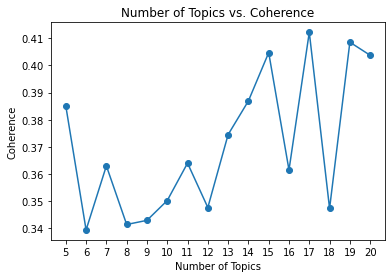

In [19]:
# graph coherence value
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.savefig('cv_18.png')
plt.show()

In [68]:
# fit model on dataset after choosing the best number of topics
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(doc_term_matrix, num_topics=15, id2word = dictionary18, passes=50,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
# use pyLDAvis to determine lambda value and visualize clusters
topic_data18 =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary18, mds = 'pcoa')
pyLDAvis.save_html(topic_data18, 'lda18.html')
pyLDAvis.display(topic_data18)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [70]:
# create dictionary for each topic, including words and weights
all_topics = {}
num_terms = 10 
lambd = 0.4
for i in range(1,16): 
    topic = topic_data18.topic_info[topic_data18.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
# convert dictionary to dataframe
topics18 = pd.DataFrame(all_topics).T
topics18.to_csv('topics_18.csv',index=False)
topics18

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9
Topic 1,mental,health,illness,issue,mentalhealth,child,physical,stigma,service,problem
Topic 2,feel,anxiety,like,feeling,fear,even,thing,going,depression,still
Topic 3,help,someone,know,others,need,please,ask,family,reach,friend
Topic 4,bipolar,depression,post,bpd,endthestigma,insomnia,check,blog,anxiety,mentalhealthawareness
Topic 5,looking,forward,next,meeting,future,group,storytellingsaveslives,mentalhealth,see,website
Topic 6,day,morning,tweet,initiative,weekend,happy,good,bellletstalk,lovely,bell
Topic 7,awareness,raise,charity,running,homeless,raising,team,event,cast,ticket
Topic 8,stress,mindfulness,wellness,motivation,meditation,happiness,peace,yoga,mind,selfcare
Topic 9,suicide,story,suicideprevention,music,suicideawareness,video,black,repost,watch,link
Topic 10,art,medium,interesting,social,conference,panel,socialmedia,discussion,nowhere,innovation


### 2019 ###

In [7]:
# create 2019 dataset
df19 = df[df['Date'].dt.year == 2019]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# tokenization
df19['tokens'] = df19.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)

df19.head()

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-8-c8fea421b493>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df19['tokens'] = df19.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)


,Unnamed: 0.1,Unnamed: 0,Tweet Id,Text,Username,cleaned_text,Date,year,month,tokens
251945,251945,0,1.126834e+18,We have to stop comparing ourselves to other p...,iammeggan,stop comparing people recovery time frame best...,2019-05-10 12:59:18+00:00,2019,5,"[stop, comparing, people, recovery, time, fram..."
251946,251946,1,1.211784e+18,Interesting article\n#guthealth #mentalhealth ...,jmmayes,interesting article guthealth mentalhealth,2019-12-30 23:00:07+00:00,2019,12,"[interesting, article, guthealth, mentalhealth]"
251947,251947,2,1.211683e+18,We need to and should be doing so much more.\n...,MackenzieM4NH,need much christmas eve adult kid waiting emer...,2019-12-30 16:20:25+00:00,2019,12,"[need, much, christmas, eve, adult, kid, waiti..."
251948,251948,3,1.211661e+18,Lost another brother I served with to suicide ...,beardedphotog24,lost another brother served suicide fucking sy...,2019-12-30 14:49:39+00:00,2019,12,"[lost, another, brother, served, suicide, fuck..."
251949,251949,4,1.211642e+18,I did this training back in Seattle. I recomme...,Blitz_N_Me,training back seattle recommend information su...,2019-12-30 13:35:57+00:00,2019,12,"[training, back, seattle, recommend, informati..."


In [9]:
# create dictionary
dictionary19 = corpora.Dictionary(df19['tokens'])

# number of unique words
print(dictionary19.num_nnz)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1008238


In [10]:
# create document term matrix
doc_term_matrix = [dictionary19.doc2bow(doc) for doc in df19['tokens'] ]
print(len(doc_term_matrix))

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


67178


In [12]:
# get the coherence value for k topics
coherence = []
lda = gensim.models.ldamodel.LdaModel

for k in range(5,21):
    print('Round: '+str(k))
    lda = gensim.models.ldamodel.LdaModel
    ldamodel = lda(doc_term_matrix, num_topics=k, \
               id2word = dictionary19, passes=50,\
               iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=df19['tokens'],\
         dictionary=dictionary19, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20


In [13]:
# set x and y values to number of topics and coherence value respectively
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


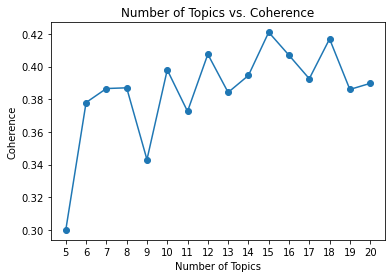

In [14]:
# graph coherence value
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.savefig('cv_19.png')
plt.show()

In [59]:
# fit model on dataset after choosing the best number of topics
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(doc_term_matrix, num_topics=8, id2word = dictionary19, passes=50,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
# use pyLDAvis to determine lambda value and visualize clusters
topic_data19 =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary19, mds = 'pcoa')
pyLDAvis.save_html(topic_data19, 'lda19.html')
pyLDAvis.display(topic_data19)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [61]:
# create dictionary for each topic, including words and weights
all_topics = {}
num_terms = 10 
lambd = 0.4
for i in range(1,9): 
    topic = topic_data19.topic_info[topic_data19.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
# convert dictionary to dataframe
topics19 = pd.DataFrame(all_topics).T
topics19.to_csv('topics_19.csv',index=False)
topics19

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9
Topic 1,whether,recommend,kid,computer,familymedicine,close,replaced,emergency,hereatnu,man
Topic 2,pcoswarrior,soberlife,wellness,mentalhealthmatters,brother,loveyourself,kid,llwynonn,best,benefit
Topic 3,otherwise,matter,kid,sobriety,stigma,cancer,gtto,office,doublestandards,talked
Topic 4,battling,copy,reporting,solution,fundraiser,itschristmasyall,extrovert,chrissy,sell,thrive
Topic 5,ptsd,rush,move,mentalhealthwarrior,kudos,teaching,hell,gong,box,state
Topic 6,mayalllovesurroundyou,first,proudparentconf,brilliant,wordcount,fuckdepression,subway,spanking,teamem,run
Topic 7,along,created,nycdivorce,fanart,birthday,outline,anxietyisabitch,unsatisfied,bariatric,nice
Topic 8,amount,destigmatise,catsofinstagram,yall,felt,region,psychosocial,opportunity,lord,ladygaga


### 2020 ###

In [15]:
# create 2020 dataset
df20 = df[df['Date'].dt.year == 2020]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# tokenization
df20['tokens'] = df20.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)

df20.head()

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-32fa6ec3ce1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20['tokens'] = df20.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)


,Unnamed: 0.1,Unnamed: 0,Tweet Id,Text,Username,cleaned_text,Date,year,month,tokens
125644,125644,0,1.344371e+18,Something unexpected that I re-learned about m...,CandidlyCorinne,something unexpected relearned quarantine anxi...,2020-12-30 19:52:23+00:00,2020,12,"[something, unexpected, relearned, quarantine,..."
125645,125645,1,1.344365e+18,If you have cancer everyone gets it. If you su...,jesswilson8525,cancer everyone get suffer infertility one und...,2020-12-30 19:30:11+00:00,2020,12,"[cancer, everyone, get, suffer, infertility, o..."
125646,125646,2,1.344326e+18,It makes me feel some type of way knowing I sp...,BeatsByTheKil0,make feel type way knowing spent last teenage ...,2020-12-30 16:54:33+00:00,2020,12,"[make, feel, type, way, knowing, spent, last, ..."
125647,125647,3,1.344309e+18,Help someone with their groceries\n\n#ActsOfKi...,KindnessPurpose,help someone grocery actsofkindness kindnessis...,2020-12-30 15:48:33+00:00,2020,12,"[help, someone, grocery, actsofkindness, kindn..."
125648,125648,4,1.344309e+18,Sometimes miracles are just good people with k...,KindnessPurpose,sometimes miracle good people kind heart kindn...,2020-12-30 15:46:34+00:00,2020,12,"[sometimes, miracle, good, people, kind, heart..."


In [17]:
# create dictionary
dictionary20 = corpora.Dictionary(df20['tokens'])

# number of unique words
print(dictionary20.num_nnz)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1098975


In [18]:
# create document term matrix
doc_term_matrix = [dictionary20.doc2bow(doc) for doc in df20['tokens'] ]
print(len(doc_term_matrix))

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


71816


In [19]:
# get the coherence value for k topics
coherence = []

for k in range(5,21):
    print('Round: '+str(k))
    ldamodel = lda(doc_term_matrix, num_topics=k, \
               id2word = dictionary20, passes=50,\
               iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=df20['tokens'],\
         dictionary=dictionary20, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

Round: 5


/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20


In [20]:
# set x and y values to number of topics and coherence value respectively
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


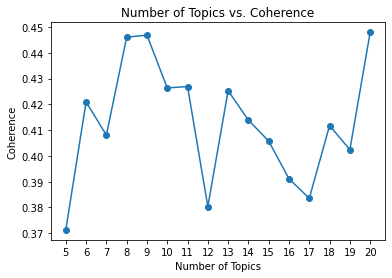

In [21]:
# graph coherence value
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.savefig('cv_20.png')
plt.show()

In [48]:
# fit model on dataset after choosing the best number of topics
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(doc_term_matrix, num_topics=8, id2word = dictionary20, passes=50,\
               iterations=200,  chunksize = 5000, eval_every = None, random_state=0)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# use pyLDAvis to determine lambda value and visualize clusters
topic_data20 =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary20, mds = 'pcoa')
pyLDAvis.save_html(topic_data20, 'lda20.html')
pyLDAvis.display(topic_data20)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [50]:
# create dictionary for each topic, including words and weights
all_topics = {}
num_terms = 10 
lambd = 0.8
for i in range(1,9): 
    topic = topic_data20.topic_info[topic_data20.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# convert dictionary to dataframe
topics20 = pd.DataFrame(all_topics).T
topics20.to_csv('topics_20.csv',index=False)
topics20

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9
Topic 1,show,kindness,wit,amount,regular,today,recieve,epilepsy,ruderman,break
Topic 2,show,urgent,today,social,recoveryispossible,pandemic,say,coping,countdowntotheholidays,frontlineheroes
Topic 3,show,ocdirl,holy,save,immigration,borough,dabundleboyz,optimistic,exclusive,cope
Topic 4,show,frontlineheroes,fourth,mankind,got,beyond,teilhard,art,ended,ruderman
Topic 5,air,selfcare,wyproud,instyle,morment,grow,show,mayoral,lostinwilderness,generous
Topic 6,skill,wit,today,substancemisuseawareness,emotionalabuse,show,screenshot,burnout,search,est
Topic 7,found,fresh,fingal,communityvoicephl,truly,option,staystrong,higherself,getting,even
Topic 8,zero,broader,suicideawareness,scientist,billsmafia,gateway,mhaw,adversityquotes,deserves,booster


### 2021 ###

In [22]:
# create 2021 dataset
df21 = df[df['Date'].dt.year == 2021]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# tokenization
df21['tokens'] = df21.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)

df21.head()

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-0815a096fc67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df21['tokens'] = df21.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)


,Unnamed: 0.1,Unnamed: 0,Tweet Id,Text,Username,cleaned_text,Date,year,month,tokens
197460,197460,0,1.476676e+18,#depression will never keep me down. #Fulldisc...,McintoshRasheed,depression never keep fulldisclosure learned s...,2021-12-30 22:05:20+00:00,2021,12,"[depression, never, keep, fulldisclosure, lear..."
197461,197461,1,1.476625e+18,🚨 Last 2021 issue of Asia Pacific Psychiatry i...,victorpsanchez,last issue asia pacific psychiatry dedicated g...,2021-12-30 18:44:06+00:00,2021,12,"[last, issue, asia, pacific, psychiatry, dedic..."
197462,197462,2,1.476578e+18,"When we think of perfection, we tend to concei...",leonscafe31,think perfection tend conceive notion perfect ...,2021-12-30 15:37:35+00:00,2021,12,"[think, perfection, tend, conceive, notion, pe..."
197463,197463,3,1.476545e+18,Consider these 4 ways #decluttering can help #...,JDogBucksCounty,consider way decluttering help improve mentalh...,2021-12-30 13:23:50+00:00,2021,12,"[consider, way, decluttering, help, improve, m..."
197464,197464,4,1.476535e+18,How will you prioritize your #mentalhealth in...,DrRebeccaHasson,prioritize mentalhealth daily exercise physica...,2021-12-30 12:46:31+00:00,2021,12,"[prioritize, mentalhealth, daily, exercise, ph..."


In [24]:
# create dictionary
dictionary21 = corpora.Dictionary(df21['tokens'])

# number of unique words
print(dictionary21.num_nnz)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


817613


In [25]:
# create document term matrix
doc_term_matrix = [dictionary21.doc2bow(doc) for doc in df21['tokens'] ]
print(len(doc_term_matrix))

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


54485


In [26]:
# get the coherence value for k topics
coherence = []

for k in range(5,21):
    print('Round: '+str(k))
    ldamodel = lda(doc_term_matrix, num_topics=k, \
               id2word = dictionary21, passes=50,\
               iterations=200, chunksize = 10000, eval_every = None)
    
    cm = gensim.models.coherencemodel.CoherenceModel(\
         model=ldamodel, texts=df21['tokens'],\
         dictionary=dictionary21, coherence='c_v')   
                                                
    coherence.append((k,cm.get_coherence()))

Round: 5


/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20


In [27]:
# set x and y values to number of topics and coherence value respectively
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


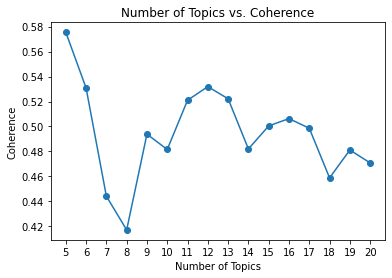

In [28]:
# graph coherence value
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.savefig('cv_21.png')
plt.show()

In [29]:
# fit model on dataset after choosing the best number of topics
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(doc_term_matrix, num_topics=5, id2word = dictionary21, passes=50,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# use pyLDAvis to determine lambda value and visualize clusters
topic_data21 =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary21, mds = 'pcoa')
pyLDAvis.save_html(topic_data21, 'lda21.html')
pyLDAvis.display(topic_data21)

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [31]:
# create dictionary for each topic, including words and weights
all_topics = {}
num_terms = 10 
lambd = 0.4
for i in range(1,6): 
    topic = topic_data21.topic_info[topic_data21.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# convert dictionary to dataframe
topics21 = pd.DataFrame(all_topics).T
topics21.to_csv('topics_21.csv',index=False)
topics21

/Users/kennareagan/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9
Topic 1,health,mental,mentalhealth,support,wellbeing,community,awareness,child,thank,wellness
Topic 2,anxiety,depression,feel,know,like,help,feeling,people,never,get
Topic 3,morning,mentalhealth,positive,mindset,day,walk,goal,selfcare,meditation,nature
Topic 4,sometimes,always,shameless,sad,sassy,blog,writingcommunity,poetry,wordpress,blogger
Topic 5,cat,book,audible,kindleunlimited,veteran,ptsd,war,circle,hummingbird,pepper
